<a href="https://colab.research.google.com/github/KhalidNazzar/SentimentAnalysis/blob/main/OmicronSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator

In [2]:
import zipfile
zip_ref = zipfile.ZipFile('omicron.csv.zip')
zip_ref.extractall()
zip_ref.close()

In [4]:
data = pd.read_csv('omicron.csv')
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1465693385088323591,Abaris,Hants,"Would appear on Blogger (did originally), but...",2009-09-16 14:30:32,2880,4369,26907,False,2021-11-30 14:45:08,"@SkyNews ""Told you I'd be Back!"" #OMICRON “Odi...",['OMICRON'],Twitter Web App,0,0,False
1,1465693062999412746,GFTs ,Lalaland,There's a field somewhere beyond all doubt and...,2019-12-28 14:29:13,165,583,21152,False,2021-11-30 14:43:52,Someone told me this in October #Omicron https...,['Omicron'],Twitter for Android,0,0,False
2,1465690116442279942,Herbie Finkle (Cozy),NaN,help me find me frens ❤️,2021-07-10 09:40:57,114,393,2339,False,2021-11-30 14:32:09,Glad to see the public schoolkids are wrapping...,['COVID'],Twitter Web App,0,1,False
3,1465689607165591552,Electrical Review,United Kingdom,Electrical Review is a monthly journal aimed a...,2009-05-21 08:32:19,20759,2321,739,False,2021-11-30 14:30:08,#Automation systems have become increasingly c...,['Automation'],Hootsuite Inc.,0,0,False
4,1465688203709464578,BingX Academy 🔑,NaN,BingX (Prev. Bingbon) is the world's top crypt...,2013-12-31 02:57:32,17134,8,31,False,2021-11-30 14:24:33,"🟢 If u think Omicron is a FUD, you LONG📈\n🔴 If...",NaN,Twitter Web App,2,2,False


In [5]:
data.isnull().sum()

id                     0
user_name              0
user_location       5826
user_description    1603
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            5914
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24168 entries, 0 to 24167
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                24168 non-null  int64 
 1   user_name         24168 non-null  object
 2   user_location     18342 non-null  object
 3   user_description  22565 non-null  object
 4   user_created      24168 non-null  object
 5   user_followers    24168 non-null  int64 
 6   user_friends      24168 non-null  int64 
 7   user_favourites   24168 non-null  int64 
 8   user_verified     24168 non-null  bool  
 9   date              24168 non-null  object
 10  text              24168 non-null  object
 11  hashtags          18254 non-null  object
 12  source            24168 non-null  object
 13  retweets          24168 non-null  int64 
 14  favorites         24168 non-null  int64 
 15  is_retweet        24168 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 2.6+ MB


In [12]:
data = data.dropna()

In [14]:
data.isnull().sum()

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64

In [16]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


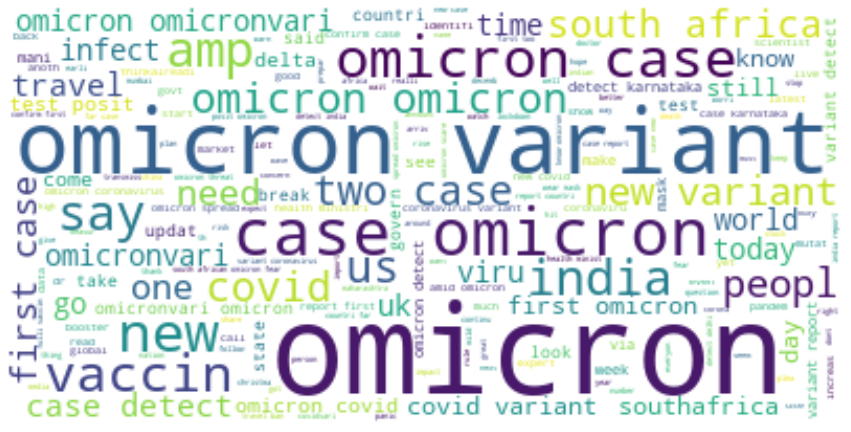

In [18]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

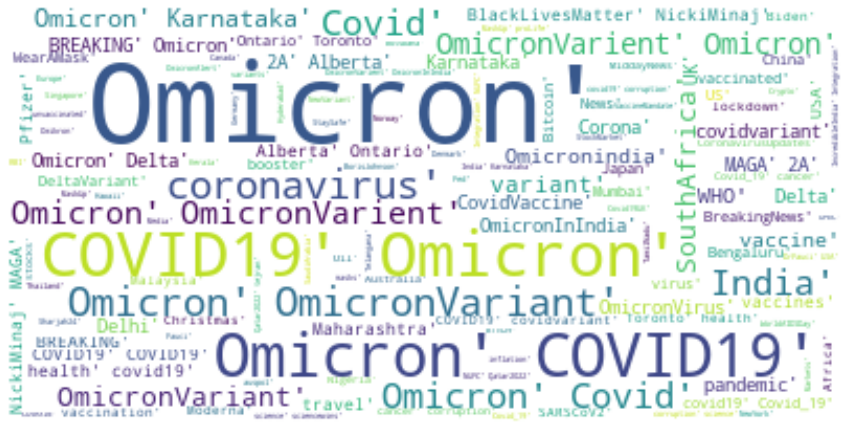

In [19]:
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [20]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
                                                text  ...  Neutral
0  skynew told id back omicron “odium medicum ins...  ...    0.840
1                         someon told octob omicron   ...    1.000
3  autom system becom increas complex effort test...  ...    1.000
5  digitaldisrupt emerg technolog stay privat inv...  ...    1.000
7  fatigu head bodi ach occasion sore throat coug...  ...    0.828

[5 rows x 4 columns]


In [21]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 
